# **Practical No.:1**
# **Implementing advanced deep learning algorithms such as convolutional neural networks (CNNs) using Tensorflow**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

**The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples**

https://keras.io/api/datasets/mnist/

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Normalize the images (scale from 0-255 → 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Add a channel dimension: (28,28) → (28,28,1)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 digits: 0–9
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 28ms/step - accuracy: 0.9002 - loss: 0.3247 - val_accuracy: 0.9847 - val_loss: 0.0518
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 26ms/step - accuracy: 0.9839 - loss: 0.0506 - val_accuracy: 0.9893 - val_loss: 0.0379
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - accuracy: 0.9891 - loss: 0.0329 - val_accuracy: 0.9907 - val_loss: 0.0322
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9921 - loss: 0.0240 - val_accuracy: 0.9913 - val_loss: 0.0326
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.9946 - loss: 0.0166 - val_accuracy: 0.9888 - val_loss: 0.0428


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9874 - loss: 0.0437
Test accuracy: 0.9898


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


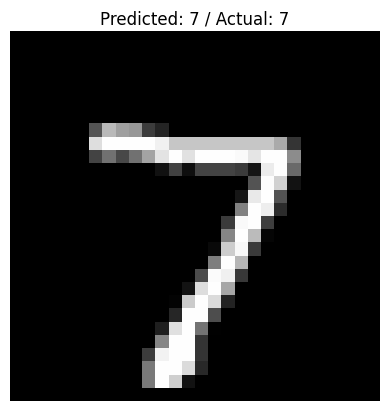

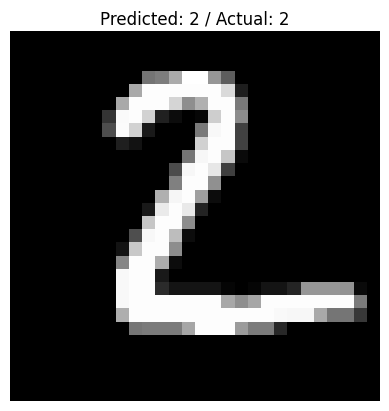

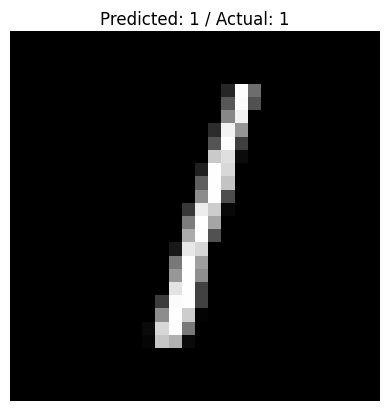

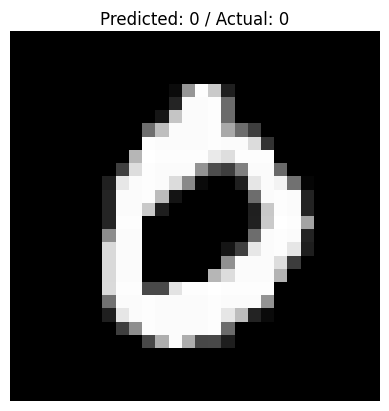

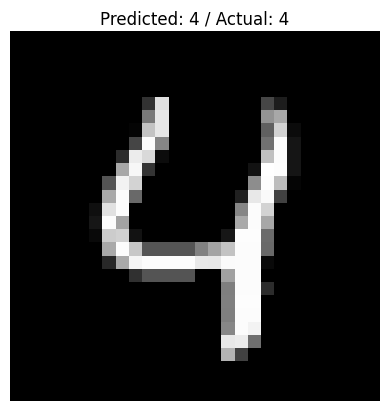

In [ ]:
predictions = model.predict(x_test)

# Plot a few predictions
for i in range(5):
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])} / Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()